# ListView

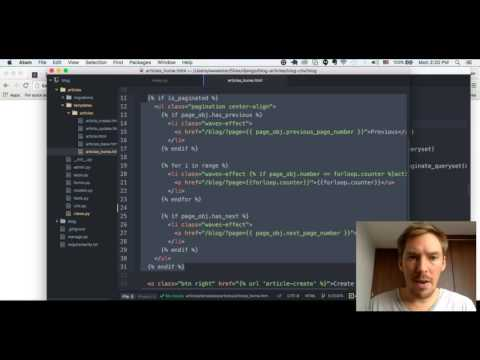

In [3]:
from IPython.display import YouTubeVideo
YouTubeVideo('8kjI5Sk9n44',width=800, height=500)

[full django ListView source](https://gist.github.com/guinslym/248eaddac9c6d85881145dc0d91d33d5)


```python
# exerpt from list.py from django
class ListView(MultipleObjectTemplateResponseMixin, BaseListView):
    """
    Render some list of objects, set by `self.model` or `self.queryset`.
    `self.queryset` can actually be any iterable of items, not just a queryset.
    """
        
```

<hr style="border:1px solid black"/>

### Example

[source](https://github.com/neeraj12121/blog-django/blob/33fcedecb25d339ea30927f7acd434a0f97105f3/app/views.py#L5)

```python

from django.views import generic
class BlogIndex(generic.ListView):
    queryset = models.Blog.objects.published()
    template_name = "home.html"
    paginate_by = 2
```   

[source](https://github.com/CoinLQ/SegmentationCheck/blob/c4da2f34d9c9867a0921fa4e413efdfc4d731332/characters/views.py#L22)

```python
from django.views import generic

class NewIndex(ListView):
    model = CharacterStatistics
    template_name = 'characters/characterstatistics_list.html'
    def get_queryset(self):
        return CharacterStatistics.objects.all().order_by('-total_cnt','char')
```   

[source](https://github.com/eugene-batalov/buddakrut/blob/e423e63227ef716bac45845c9256dbe9fe8f4c83/ongames/views.py#L15)


```python
class IndexView(generic.ListView):
    template_name = 'ongames/index.html'
    context_object_name = 'latest_users_list'

    def get_queryset(self):
        """Return the last five users."""
        return Users.objects.order_by('-idusers')[:5]
```   

[source](https://github.com/importchen/codeflitting/blob/69d3d1ff5d42577bd832a4bb62ccf82508a9711d/blog/views.py#L11)

```python
from django.views.generic.list import ListView

class IndexView(ListView):
    template_name = "blog/index.html"
    context_object_name = "article_list"

    def get_queryset(self):
        article_list = Article.objects.filter(status='p')
        for article in article_list:
            # article.body = markdown2.markdown(article.body, extras=['fenced-code-blocks',
            #                                                        'tables'], )
            article.title = article.title.replace('-', ' ')
        return article_list

    def get_context_data(self, **kwargs):
        kwargs['category_list'] = Category.objects.all().order_by('name')
        kwargs['tag_list'] = Tag.objects.all().order_by('name')
        kwargs['recent'] = Article.objects.all().order_by('last_modified_time')[:6]
        kwargs['home'] = 'selected active current'
        return super(IndexView, self).get_context_data(**kwargs)

```   

[source](https://github.com/parksandwildlife/prs/blob/3436990816a681ca50dc9b22273481441f652bca/prs2/referral/views.py#L49)

```python
class SiteHome(LoginRequiredMixin, ListView):
    """Site home page view. Returns an object list of tasks (ongoing or stopped).
    """
    stopped_tasks = False
    printable = False

    def get_queryset(self):
        qs = Task.objects.current().filter(assigned_user=self.request.user)
        if self.stopped_tasks:
            qs = qs.filter(state__name='Stopped').order_by('stop_date')
        else:
            qs = qs.filter(state__is_ongoing=True)
        return qs

    def get_template_names(self):
        if 'print' in self.request.GET or self.printable:
            return 'site_home_print.html'
        else:
            return'site_home.html'

    def get_context_data(self, **kwargs):
        context = super(SiteHome, self).get_context_data(**kwargs)
        context['stopped_tasks'] = self.stopped_tasks
        context['headers'] = copy(Task.headers_site_home)
        if not self.stopped_tasks:
            context['stopped_tasks_exist'] = Task.objects.current().filter(
                assigned_user=self.request.user, state__name='Stopped').exists()
        # Printable view only: pop the last element from 'headers'
        if 'print' in self.request.GET or self.printable:
            context['headers'].pop()
        context['page_title'] = settings.APPLICATION_ACRONYM
        context['breadcrumb_trail'] = breadcrumbs_li([(None, 'Home')])
        return context
```   

[source](https://github.com/Fabitosoft/odecopack/blob/e344e26bf20d98b20f2b6315c861f7ad0a459b01/cotizaciones/views.py#L90)

```python
from django.db.models import Q

class CotizacionesListView(ListView):
    model = Cotizacion

    def get_queryset(self):
        query = self.request.GET.get("buscado")
        if not query:
            query = ""
        print(query)
        qs = Cotizacion.objects.filter(
            (Q(usuario=self.request.user) &
            ~Q(estado="INI")) &
            (
                Q(nombres_contacto__icontains=query) |
                Q(nro_cotizacion__icontains=query) |
                Q(ciudad__icontains=query) |
                Q(razon_social__icontains=query) |
                Q(items__item__descripcion_estandar__icontains=query) |
                Q(items__item__referencia__icontains=query)
            )
        ).order_by('-total').distinct()
        return qs

    def get_context_data(self, **kwargs):
        context = super().get_context_data(**kwargs)
        context["form_busqueda"] = BusquedaCotiForm(self.request.GET or None)
        return context
```   